In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Implement a KNN model to classify the animals in to categories

# Zoo Dataset

In [2]:
df = pd.read_csv(r"C:\Users\krush\Desktop\Data Science\Assignments\KNN\Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.drop(columns='animal name', inplace= True)

In [29]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

## Visualization

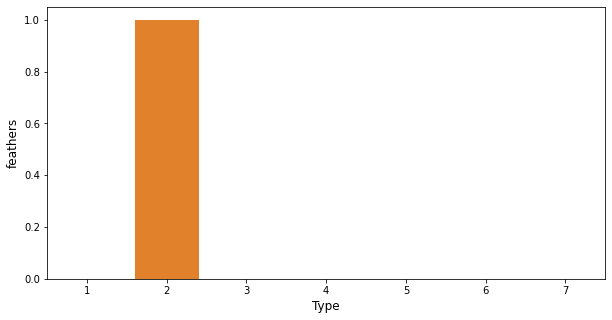

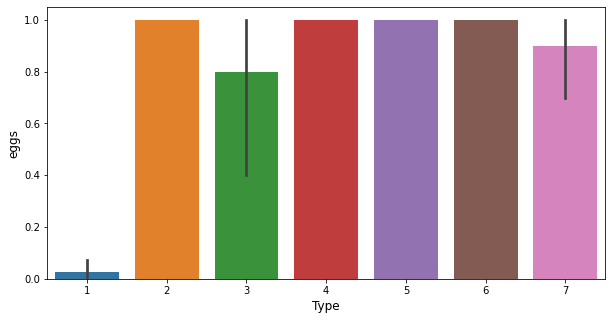

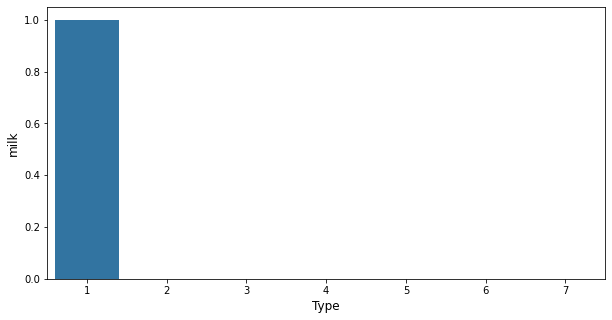

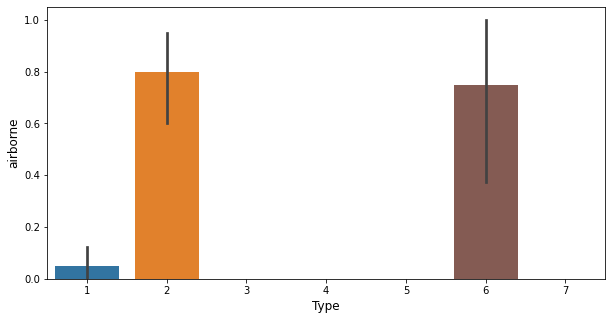

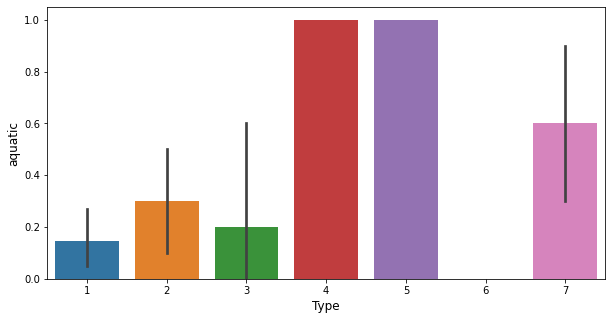

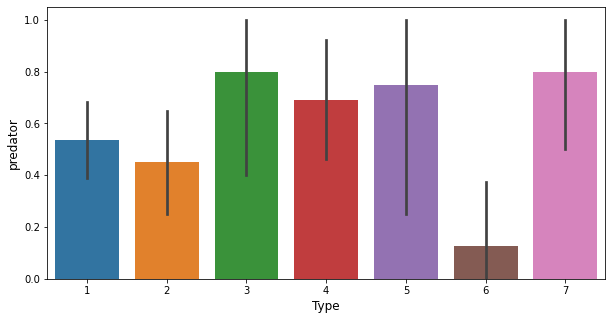

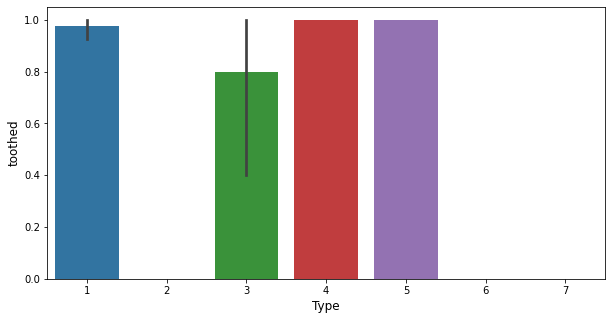

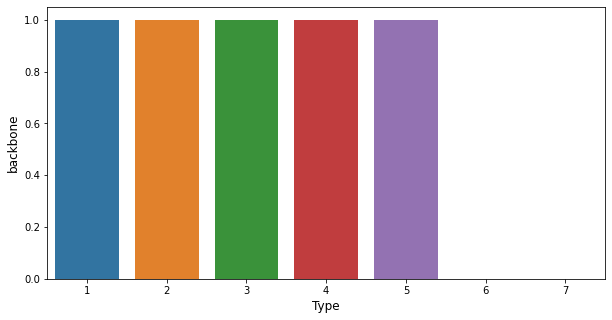

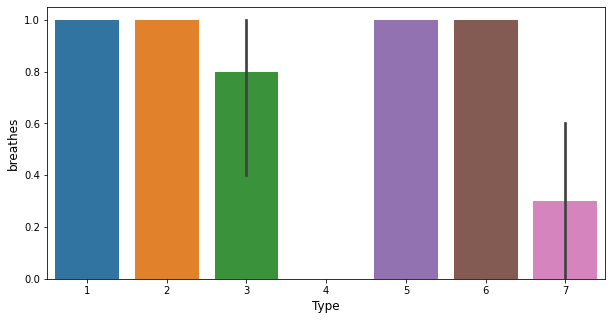

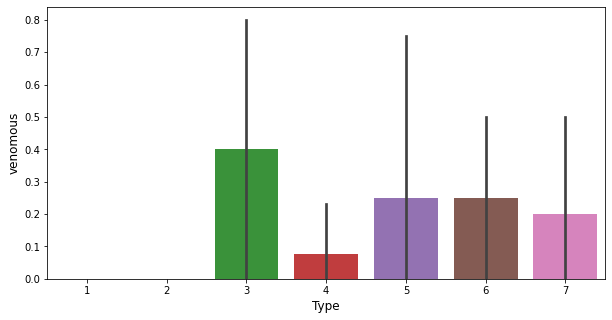

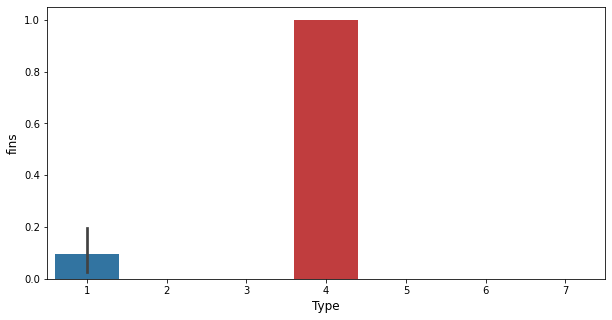

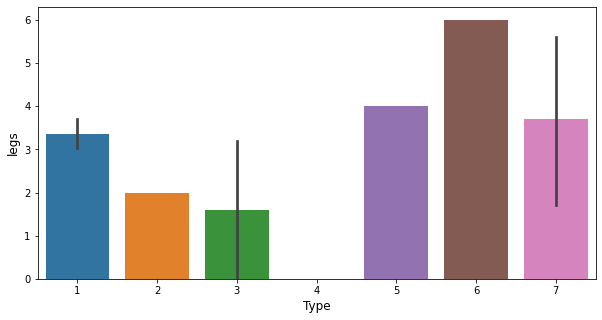

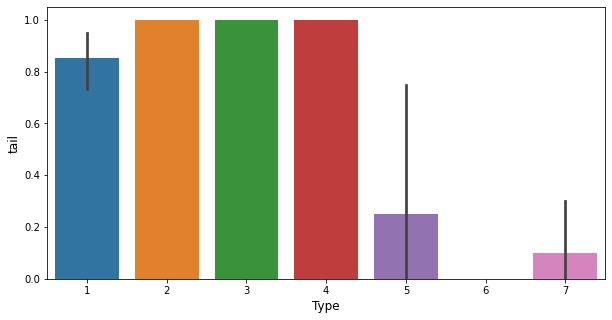

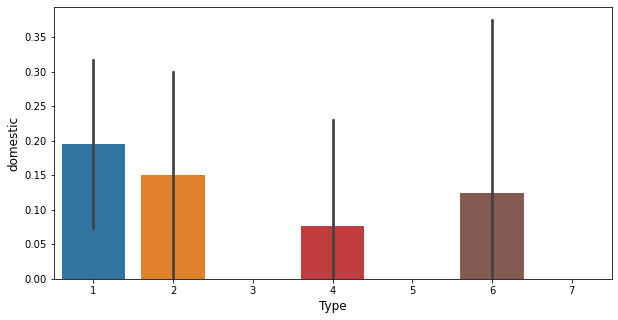

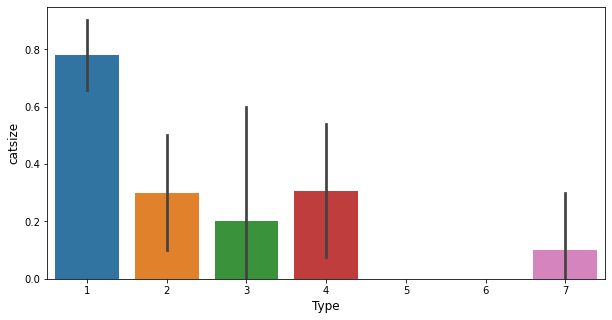

In [33]:
for i in df.columns[1:-1]:
    plt.figure(figsize=(10,5))
    sns.barplot(x = 'type', y=i, data=df)
    plt.xlabel('Type',fontsize=12)
    plt.ylabel(i, fontsize=12)
    plt.show()

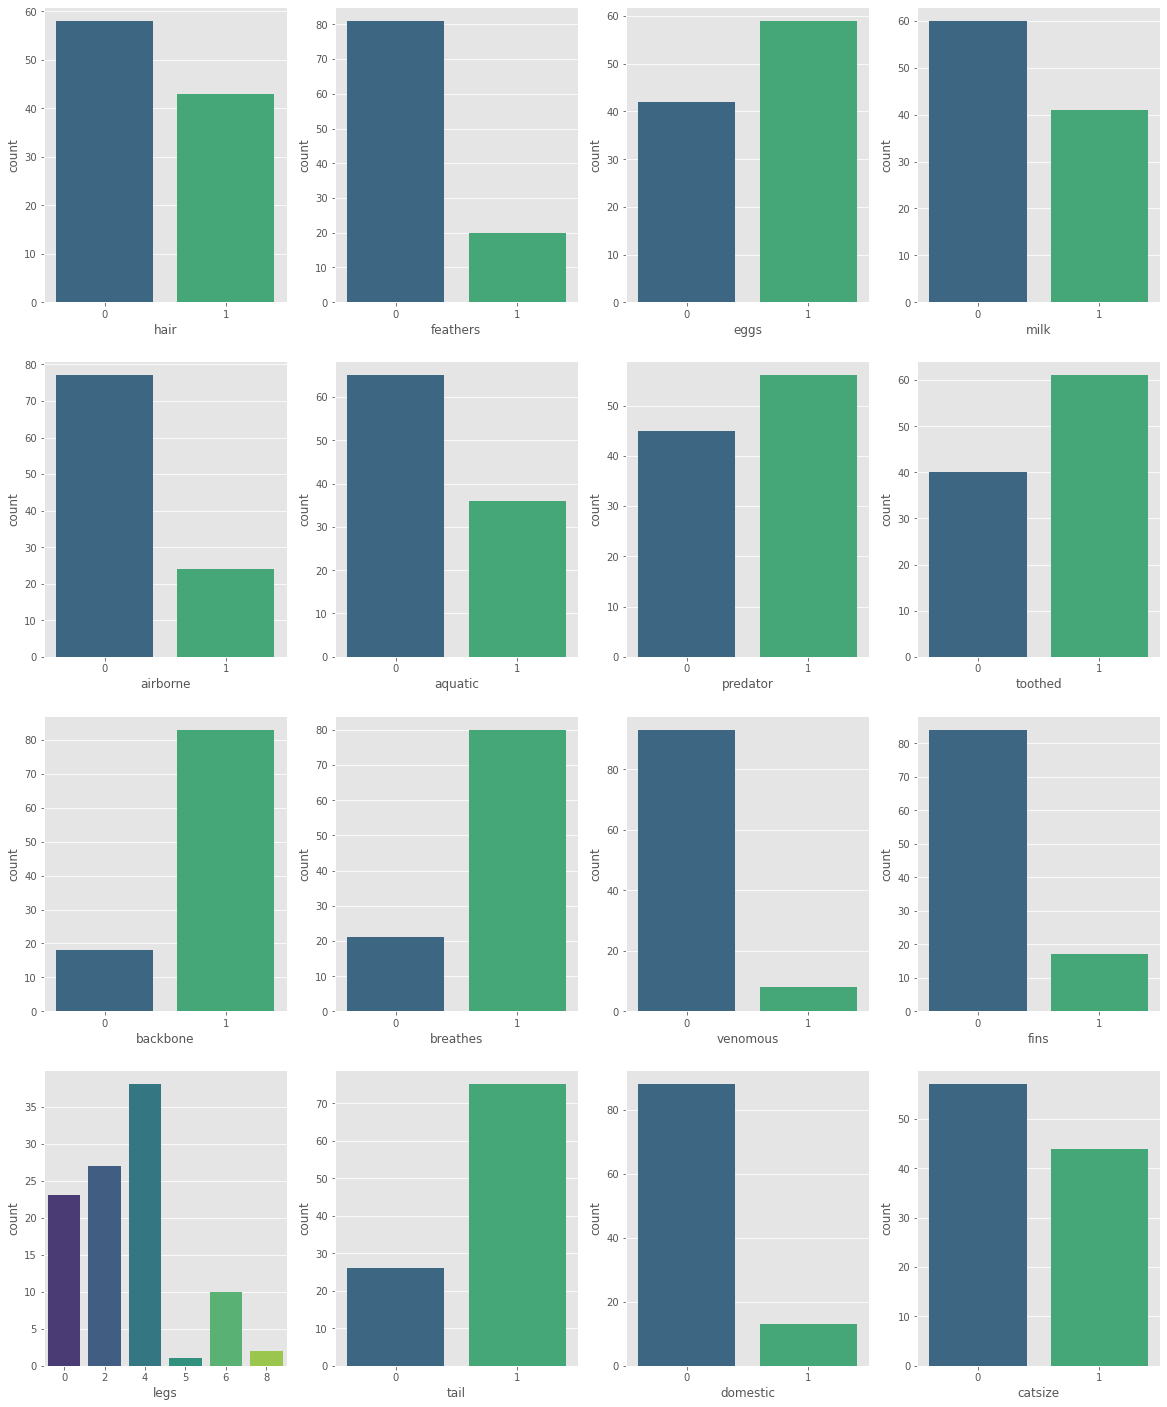

In [62]:
plt.style.use("ggplot")
fig, ax = plt.subplots(4,4, figsize = (20,25)) 

sns.countplot(df['hair'], palette = 'viridis', ax = ax[0,0])
sns.countplot(df['feathers'], palette = 'viridis', ax = ax[0,1])
sns.countplot(df['eggs'], palette = 'viridis', ax = ax[0,2])
sns.countplot(df['milk'], palette = 'viridis', ax = ax[0,3])

sns.countplot(df['airborne'], palette = 'viridis', ax = ax[1,0])
sns.countplot(df['aquatic'], palette = 'viridis', ax = ax[1,1])
sns.countplot(df['predator'], palette = 'viridis', ax = ax[1,2])
sns.countplot(df['toothed'], palette = 'viridis', ax = ax[1,3])

sns.countplot(df['backbone'], palette = 'viridis', ax = ax[2,0])
sns.countplot(df["breathes"], palette = 'viridis', ax = ax[2,1])
sns.countplot(df["venomous"], palette = 'viridis', ax = ax[2,2])
sns.countplot(df["fins"], palette = 'viridis', ax = ax[2,3])

sns.countplot(df['legs'], palette = 'viridis', ax = ax[3,0])
sns.countplot(df['tail'], palette = 'viridis', ax = ax[3,1])
sns.countplot(df['domestic'], palette = 'viridis', ax = ax[3,2]);
sns.countplot(df['catsize'], palette = 'viridis', ax = ax[3,3]);

<AxesSubplot:>

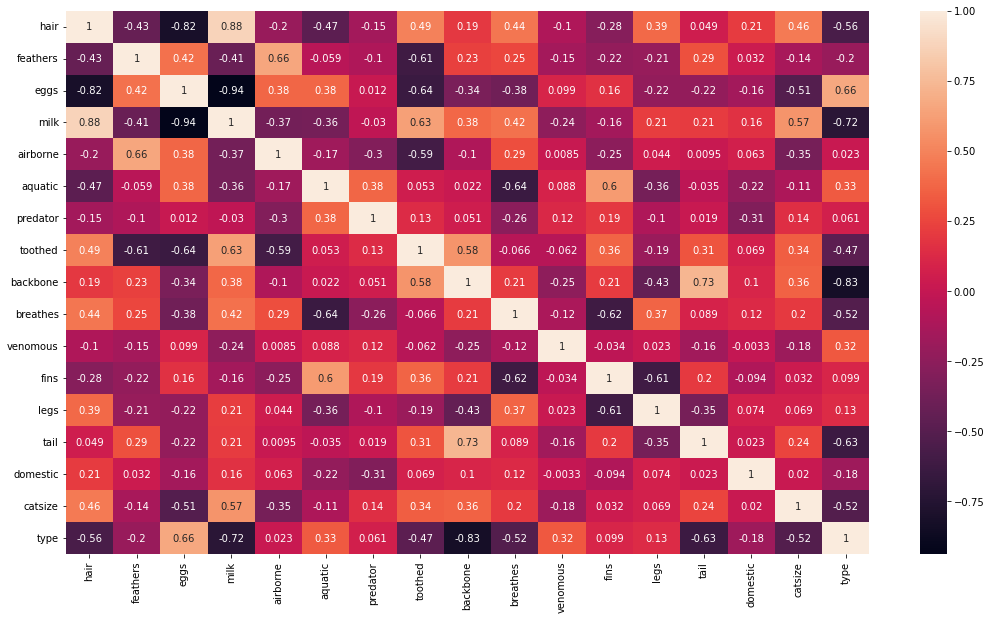

In [35]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

## Training and Testing Data Split

In [58]:
x = df.iloc[:,1:-1]
y = df['type']

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [60]:
print('Shape of xtrain: ', xtrain.shape)
print('Shape of xtest: ', xtest.shape)
print('Shape of ytrain: ', ytrain.shape)
print('Shape of ytest: ', ytest.shape)

Shape of xtrain:  (80, 15)
Shape of xtest:  (21, 15)
Shape of ytrain:  (80,)
Shape of ytest:  (21,)


## Model Building

In [13]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

In [14]:
confusion_matrix(ytest, ypred)

array([[10,  0,  0,  1,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  2]], dtype=int64)

In [17]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.90        21
   macro avg       0.72      0.82      0.74        21
weighted avg       0.92      0.90      0.90        21



In [18]:
print(knn.score(xtrain, ytrain))
print(knn.score(xtest, ytest))

0.875
0.9047619047619048


## Selecting best value for K

In [19]:
trainac = []
testac = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    trainac.append(knn.score(xtrain, ytrain))
    testac.append(knn.score(xtest, ytest))

Text(0, 0.5, 'accuracy')

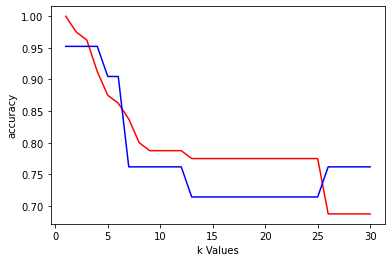

In [20]:
plt.plot(range(1,31), trainac, color = 'r')
plt.plot(range(1,31), testac, color = 'b')
plt.xlabel("k Values")
plt.ylabel('accuracy')

Here, k = 3

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

<AxesSubplot:>

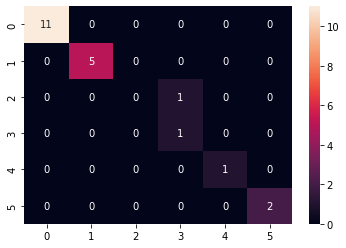

In [37]:
sns.heatmap(confusion_matrix(ytest, ypred), annot= True)

In [38]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21



In [40]:
print(knn.score(xtrain, ytrain))
print(knn.score(xtest, ytest))

0.9625
0.9523809523809523


In [42]:
pred_df = pd.DataFrame({'Actual' : ytest, 'Predicted' : ypred})
pred_df

,Actual,Predicted
94,1,1
78,2,2
17,1,1
100,2,2
36,1,1
85,7,7
55,1,1
83,2,2
82,4,4
52,5,5


#### Conclusion 
The accuracy of the model is 95.23%

## End